# 7-8. 프로젝트 : 나랑 닮은 연예인을 찾아보자

## Step1. 사진모으기

### 1. 내 사진 찍기

#### 내 사진 데이터 불러오기

[(171, 617, 439, 349)]


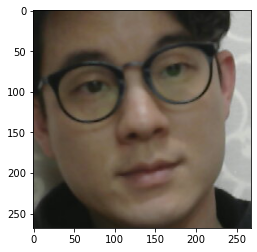

In [44]:
import face_recognition
import os

image_path = os.getenv('HOME')+'/aiffel/face_embedding/images/내사진1.jpg'
image = face_recognition.load_image_file(image_path)
face_locations = face_recognition.face_locations(image)

print(face_locations)  # 이미지에서 얼굴 영역의 좌표를 출력

%matplotlib inline
import matplotlib.pyplot as plt

a, b, c, d = face_locations[0]
cropped_face = image[a:c,d:b,:]

plt.imshow(cropped_face)

---

## Step2. 얼굴 영역 자르기

#### 이미지 파일을 불러와서 얼굴 영역을 추출해 주는 함수 작성

In [45]:
import face_recognition
import os

def get_cropped_face(image_file):
    empty = []    # 얼굴 인식이 안되는 사진을 넣어줄 빈 리스트
    image = face_recognition.load_image_file(image_file)
    face_locations = face_recognition.face_locations(image)
    if len(face_locations) == 0: return empty    # 사진 중에 얼굴 인식이 안된 사진은 빈 리스트에 넣음
    a, b, c, d = face_locations[0]
    cropped_face = image[a:c,d:b,:]
    
    return cropped_face

print("✅")

✅


#### 이미지 데이터 로드 및 얼굴 인식 함수 테스트

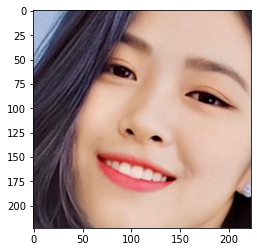

In [46]:
from PIL import Image

image_path_A = os.getenv('HOME')+'/aiffel/face_embedding/images/류진.jpg'
cropped_face_A = get_cropped_face(image_path_A)
plt.imshow(cropped_face_A)

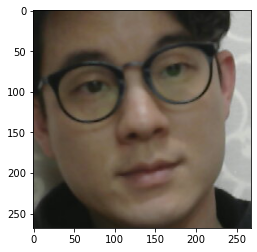

In [47]:
image_path_B = os.getenv('HOME')+'/aiffel/face_embedding/images/내사진1.jpg'
cropped_face_B = get_cropped_face(image_path_B)
plt.imshow(cropped_face_B)

# 비슷한 연예인과 비교하기 위해 얼굴 영역이 추출된 사진 저장
pillow_image_1 = Image.fromarray(cropped_face_B)
pillow_image_1.save(os.getenv('HOME')+'/aiffel/face_embedding/cropped/내사진1.jpg')

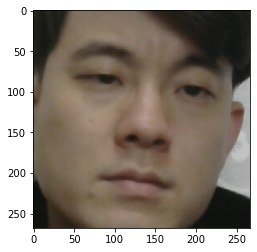

In [48]:
image_path_C = os.getenv('HOME')+'/aiffel/face_embedding/images/내사진3.jpg'
cropped_face_C = get_cropped_face(image_path_C)
plt.imshow(cropped_face_C)

#### 추출된 얼굴 영역을 임베딩 처리하는 함수

In [49]:
def get_face_embedding(face):
    return face_recognition.face_encodings(face)

#### 이미지 파일 임베딩 처리

In [50]:
# 1번째 사진 : 류진.jpg
A = get_face_embedding(cropped_face_A)  
A

[array([-0.11122777,  0.08663675,  0.017051  , -0.1163974 , -0.16989549,
         0.02521263, -0.09174974, -0.06934175,  0.15129827, -0.18338683,
         0.19576152, -0.0955777 , -0.22708641, -0.02031381, -0.08119512,
         0.26074922, -0.19216694, -0.15074106,  0.0413317 ,  0.01542739,
         0.11156975, -0.00144073, -0.06573729,  0.08293521, -0.08296922,
        -0.31832898, -0.11704412, -0.06453251, -0.06753985, -0.07284936,
        -0.04194687,  0.00920219, -0.18131478,  0.0062873 ,  0.01569609,
         0.13464274, -0.02053264, -0.09079764,  0.09930423,  0.02928306,
        -0.26626098,  0.05340939,  0.12485056,  0.22142756,  0.12894101,
         0.01671185, -0.00378052, -0.16618079,  0.10292723, -0.1955951 ,
         0.03257071,  0.13078858,  0.0897438 ,  0.06169479,  0.03686082,
        -0.10266639,  0.07959636,  0.09819489, -0.13990003,  0.0258321 ,
         0.15007661, -0.03424852,  0.01822489, -0.12251861,  0.25618237,
         0.11939427, -0.0966782 , -0.2268921 ,  0.1

In [51]:
# 2번째 사진 : 내사진1.jpg
B = get_face_embedding(cropped_face_B)  
B

[array([ 3.53930681e-03,  8.12134668e-02,  3.32361050e-02, -3.23354378e-02,
        -4.17156518e-02, -2.83983275e-02, -9.32496637e-02, -1.75627679e-01,
         9.58603248e-02, -1.46177128e-01,  3.34870726e-01, -1.05291143e-01,
        -2.79139847e-01, -1.20575331e-01, -8.70957673e-02,  1.86833784e-01,
        -1.58552498e-01, -8.36187676e-02, -2.06501521e-02, -7.11886659e-02,
         6.97729513e-02,  4.50249426e-02,  4.33902256e-02,  8.57735872e-02,
        -1.09639362e-01, -3.21927130e-01, -1.17741823e-01, -1.11690231e-01,
        -1.76661797e-02, -7.99274072e-02, -8.72247592e-02,  1.00342989e-01,
        -1.06465735e-01, -3.17308605e-02,  8.30227584e-02,  6.69112355e-02,
         1.12077259e-02, -7.36292973e-02,  2.26334095e-01,  3.38019524e-03,
        -1.53948635e-01,  8.51543397e-02,  5.36731780e-02,  2.53662199e-01,
         1.70367107e-01,  3.92299667e-02,  4.52918187e-02, -2.07897782e-01,
         1.81761399e-01, -1.43076286e-01,  9.53970104e-02,  1.49447665e-01,
         1.3

In [52]:
# 3번째 사진 : 내사진3.jpg
C = get_face_embedding(cropped_face_C)  
C

[array([ 0.00309112,  0.07778341, -0.02440572, -0.06102712, -0.07130697,
        -0.09813201, -0.00849635, -0.18211976,  0.09938688, -0.11854065,
         0.29670039, -0.10232758, -0.2581338 , -0.11227758, -0.08265908,
         0.13431762, -0.19894551, -0.08720386, -0.04278139, -0.01504903,
         0.13173471,  0.03867746,  0.03542756,  0.08327521, -0.09004906,
        -0.31743494, -0.13856563, -0.06906846,  0.02538602, -0.03870118,
        -0.02044151,  0.04079957, -0.185877  , -0.09135915,  0.07938847,
         0.00167602,  0.00725274, -0.10943645,  0.2227305 ,  0.03740745,
        -0.17784174,  0.08592854,  0.06413335,  0.26212481,  0.16193716,
         0.02599495,  0.00743498, -0.19662054,  0.15615714, -0.13563579,
         0.04967438,  0.14519957,  0.1306466 ,  0.02891023, -0.03428988,
        -0.106484  ,  0.03027912,  0.15652081, -0.22741626,  0.01989117,
         0.12877686, -0.10296747, -0.05071041, -0.07737035,  0.17788567,
         0.06362381, -0.14599611, -0.16128877,  0.1

#### 사진간의 거리 비교를 위한 형변환 (list → array)

In [56]:
import numpy as np

A = np.array(A[0])
B = np.array(B[0])
C = np.array(C[0])

print("✅")

✅


#### L2 distance

In [57]:
import numpy as np
distances = np.linalg.norm([A, B] - C, axis=1, ord=2)
print("Distance between A and C: {}".format(distances[0]))
print("Distance between B and C: {}".format(distances[1]))

Distance between A and C: 0.64951650986456
Distance between B and C: 0.3844897592178592


- 류진 이미지와 내사진3 이미지를 L2 distance로 측정한 값 : 0.64
- 내사진1 이미지와 내사진3 이미지를 L2 distance로 측정한 값 : 0.38

#### L1 distance

In [58]:
distances = np.linalg.norm([A, B] - C, axis=1, ord=1)
print("Distance between A and C: {}".format(distances[0]))
print("Distance between B and C: {}".format(distances[1]))

Distance between A and C: 6.024326133308932
Distance between B and C: 3.3565469381865114


- 류진 이미지와 내사진3 이미지를 L1 distance로 측정한 값 : 6.02
- 내사진1 이미지와 내사진3 이미지를 L1 distance로 측정한 값 : 3.35

### 2. 비교할 연예인 사진 모으기

In [27]:
import os

dir_path = os.getenv('HOME')+'/aiffel/face_embedding/images'
file_list = os.listdir(dir_path)

print ("file_list: {}".format(file_list))
print("-" * 30)
print("사진 개수 :", len(file_list))

file_list: ['유지태.jpg', '미미.jpg', '내사진4.jpg', '박신양.png', '박찬욱.jpeg', '김종서.jpg', '박항서.jpg', '장도연.jpg', '케이.jpg', '전소미.jpg', '박정민.jpg', '서강준.jpg', '노홍철.jpeg', '서현진.jpg', '온앤오프라운.jpg', '박진영.jpeg', '이대형.jpg', '마크 러팔로.jpeg', '정수빈.jpg', '박재범.jpg', '아이즈원김채원.jpg', '이제훈.jpeg', '이재용.jpg', '이효리.jpg', '슬기.jpg', '크리스 에반스.jpg', '김영삼.jpeg', '손흥민.jpg', '크리스 햄스워스.jpg', '무라니시.png', '이성민.jpg', '송중기.jpeg', '박서준.jpeg', '이승환.jpg', '이정재.jpeg', '최양락.jpg', '최민식.jpg', '박보영.jpg', '정형돈.jpg', '최준석.jpg', '공효진.jpg', '유아.jpg', '길.jpg', '이승기.jpeg', '트와이스모모.jpeg', '문재인.jpeg', '스윙스.jpeg', '배성재.jpg', '제니.jpg', '리아.jpg', '박성호.jpg', '배성우.png', '류현진.jpg', '지코.jpg', '태양.jpeg', '유재석.jpg', '온앤오프와이엇.jpg', '박보검.jpg', '트와이스다현.jpeg', '김유정.jpg', '내사진3.jpg', '잭 스페이더.jpeg', '신동엽.jpg', '슬리피.jpg', '피어스 브로스넌.jpg', '대도서관.jpeg', '강동원.jpg', '여자아이들수진.jpeg', '한효주.jpg', '윤아.jpg', '김대명.jpeg', '고창석.jpeg', '승희.jpeg', '이근대위.jpeg', '존 파브르.jpeg', '수지.jpg', '잭 니콜슨.jpeg', '유희열.jpeg', '슈퍼비.jpeg', '레인보우재경.jpg', '다니엘 크레이그.jpeg', '제이크 질렌할.jpeg', '이동국.jpeg

---

## Step3. 얼굴 영역의 임베딩 추출하기

#### 이미지 파일 임베딩 및 dict 구조에 담아 리턴하는 함수

In [28]:
def get_face_embedding_dict(dir_path):
    file_list = os.listdir(dir_path)
    embedding_dict = {}

    for file in file_list:
        img_path = os.path.join(dir_path, file)
        face = get_cropped_face(img_path)
        if len(face) == 0: continue
        embedding = get_face_embedding(face)
        if len(embedding) > 0:
            embedding_dict[os.path.splitext(file)[0]] = embedding[0]

    return embedding_dict

#### get_face_embedding_dict() 함수가 잘 만들어졌는지 확인

In [29]:
embedding_dict = get_face_embedding_dict(dir_path)
embedding_dict['내사진1']

array([ 3.53930681e-03,  8.12134668e-02,  3.32361050e-02, -3.23354378e-02,
       -4.17156518e-02, -2.83983275e-02, -9.32496637e-02, -1.75627679e-01,
        9.58603248e-02, -1.46177128e-01,  3.34870726e-01, -1.05291143e-01,
       -2.79139847e-01, -1.20575331e-01, -8.70957673e-02,  1.86833784e-01,
       -1.58552498e-01, -8.36187676e-02, -2.06501521e-02, -7.11886659e-02,
        6.97729513e-02,  4.50249426e-02,  4.33902256e-02,  8.57735872e-02,
       -1.09639362e-01, -3.21927130e-01, -1.17741823e-01, -1.11690231e-01,
       -1.76661797e-02, -7.99274072e-02, -8.72247592e-02,  1.00342989e-01,
       -1.06465735e-01, -3.17308605e-02,  8.30227584e-02,  6.69112355e-02,
        1.12077259e-02, -7.36292973e-02,  2.26334095e-01,  3.38019524e-03,
       -1.53948635e-01,  8.51543397e-02,  5.36731780e-02,  2.53662199e-01,
        1.70367107e-01,  3.92299667e-02,  4.52918187e-02, -2.07897782e-01,
        1.81761399e-01, -1.43076286e-01,  9.53970104e-02,  1.49447665e-01,
        1.38949126e-01,  

---

## Step4. 모은 연예인들과 비교하기

#### dict 구조에서 이미지 간의 임베딩 벡터 거리를 측정하는 함수

In [30]:
def get_distance(name1, name2):
    return np.linalg.norm(embedding_dict[name1]-embedding_dict[name2], ord=2)

get_distance('내사진1', '내사진3')

0.3844897592178592

- 위에서 비교했을 때와 동일한 값이 측정

#### name1과 name2의 거리를 비교하는 함수

In [31]:
def get_sort_key_func(name1):    # name1은 미리 지정
    def get_distance_from_name1(name2):   #  name2는 호출시에 인자로 받도록 설정
        return get_distance(name1, name2)
    return get_distance_from_name1

sort_key_func = get_sort_key_func('내사진1')   

In [42]:
len(sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0])))

277

#### 이미지 간의 거리를 반복해서 측정하는 함수

In [33]:
def get_nearest_face(name, top=10):
    sort_key_func = get_sort_key_func(name)
    sorted_faces = sorted(embedding_dict.items(), key=lambda x:sort_key_func(x[0]))

    for i in range(top+1):
        if i == 0 :   # 첫번째로 나오는 이름은 자기 자신일 것이므로 제외합시다. 
            continue
        if sorted_faces[i]:
            print('순위 {} : 이름({}), 거리({})'.format(i, sorted_faces[i][0], sort_key_func(sorted_faces[i][0])))

#### 내사진과 가장 닮은 사람은?

In [34]:
get_nearest_face('내사진1')

순위 1 : 이름(내사진2), 거리(0.2770798652928031)
순위 2 : 이름(내사진3), 거리(0.3844897592178592)
순위 3 : 이름(내사진4), 거리(0.4159279781121027)
순위 4 : 이름(박휘순), 거리(0.48755152904606336)
순위 5 : 이름(김연우), 거리(0.49478224065074033)
순위 6 : 이름(하현우), 거리(0.501965525528963)
순위 7 : 이름(박건우), 거리(0.5177168476445504)
순위 8 : 이름(봉준호), 거리(0.5185533943332645)
순위 9 : 이름(슬리피), 거리(0.5233874288405915)
순위 10 : 이름(김종서), 거리(0.5256494715760558)


- 내사진들을 제외하고 거리값이 0.48로 "박휘순"이 제일 닯은 사람으로 측정됐다.

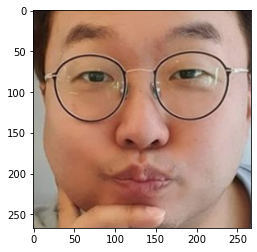

In [35]:
image_path_D = os.getenv('HOME')+'/aiffel/face_embedding/images/박휘순.jpg'
cropped_face_D = get_cropped_face(image_path_D)
plt.imshow(cropped_face_D)

# 내 사진과 비교하기 위해 얼굴 영역이 추출된 사진 저장
pillow_image_2 = Image.fromarray(cropped_face_D)
pillow_image_2.save(os.getenv('HOME')+'/aiffel/face_embedding/cropped/박휘순.jpg')

---

## Step5. 다양한 재미있는 시각화 시도해 보기

(-0.5, 266.5, 266.5, -0.5)

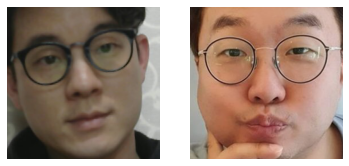

In [38]:
# 내 사진과 가장 닯은 사람 사진 나열
fig = plt.figure()
rows = 1
cols = 2

ax1 = fig.add_subplot(rows, cols, 1)
ax1.imshow(pillow_image_1)
ax1.axis("off")

ax1 = fig.add_subplot(rows, cols, 2)
ax1.imshow(pillow_image_2)
ax1.axis("off")

---

## 루브릭 평가

__1. 얼굴임베딩 벡터를 활용해 가장 닮은 연예인 Best 5를 구할 수 있다.__  
_(닮은꼴 순위, 이름, 임베딩 거리를 포함한 Top-5 리스트가 정렬되어 출력되었다.)_

- 내사진 3장을 제외한 Top-5 리스트가 아래와 같이 정렬되어 출력되었다.
    - 순위 4 : 이름(박휘순), 거리(0.48755152904606336)
    - 순위 5 : 이름(김연우), 거리(0.49478224065074033)
    - 순위 6 : 이름(하현우), 거리(0.501965525528963)
    - 순위 7 : 이름(박건우), 거리(0.5177168476445504)
    - 순위 8 : 이름(봉준호), 거리(0.5185533943332645)

__2. 충분한 수의 이미지에 대한 시도를 통해 매우 닮은꼴의 연예인을 찾아냈다.__  
_(다양한 탐색을 통해 본인과 임베딩 거리 0.5 이내로 닮은 연예인을 찾아냈다.)_

- 내사진을 제외한 284장의 셀럽 사진과 비교한 결과 두개의 이미지가 임베딩 거리 0.5 이내로 나왔다.
    - 순위 4 : 이름(박휘순), 거리(0.48755152904606336)
    - 순위 5 : 이름(김연우), 거리(0.49478224065074033)

__3. 다양하고 재미있는 결과 시각화를 시도하였다.__  
_(matplotlib 등 다양한 시각화 도구를 하나 이상 이용해 재미있는 결과 시각화를 구현하였다.)_

- 닮은 꼴 사진을 나열하였으나 시각화를 했다고 하긴에는 부족하다.

---

## 회고

__1. 프로젝트 진행시 어려웠던 점__

- 얼굴 부분이 너무 작아 인식이 되지 않아 계속 에러가 발생했던 점
- name1과 name2의 거리를 비교하는 함수가 작동하는 원리 이해
- 시각화를 위한 방법

__2. 프로젝트를 진행하면서 알아낸 점 또는 아직 모호한 점__

- 알아낸 점 : 
    - L1과 L2의 차이점
    - face_recognition를 통한 얼굴 영역 추출 방법
    - 얼굴 부분이 너무 작으면 인식이 안되는 점
    - 안경을 쓰면 임베딩 거리 차이가 많이 나는 점
    - 내 사진이 바뀔 때마다 닮은 사람도 변경이 된다는 점

__3. 루브릭 평가 지표를 맞추기 위해 시도한 점__

- 내사진도 다양한 각도 및 안경 유무에 차이를 두고 비교해 보았다.

__4. 루브릭 평가 지표를 달성하지 못한 이유__

- 다양한 시각화 시도를 하지 못했다.

__5. 프로젝트 진행 후 느낀 점 및 다짐__

- 이미지 부분은 배우면 배울수록 더 헤매는 것 같다.
- 프로젝트을 오래 끌면 기존에 어떻게 진행했는지 잊어버려서 추후 수정할 때 다시 파악하느라 많은 시간을 소모한다. 따라서, 처음 작성시 최대한 자세하게 주석을 써야겠다.